### 02. 막대 그래프 - 집단 간 차이 표현하기

막대 그래프 bar chart는 데이터의 크기를 막대의 길이로 표현한 그래프.
성별 소득 차이처럼 집단 간 차이를 표현할 때 사용.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
mpg = pd.read_csv('./input/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [18]:
print(type(mpg))
print(id(mpg))

<class 'pandas.core.frame.DataFrame'>
2553564772112


### 01. 평균 막대 그래프 만들기

평균 막대 그래프는 평균값의 크기를 막대 길이로 표현한 그래프.
여러 집단의 평균 값을 비교할 때 평균 막대 그래프를 주로 사용.

In [19]:
# mpg 데이터에서 drv(구동방식) 별 hwy(고속도로 연비) 평균을 나타낸 막대 그래프를 만듬.

# 1) 집단별 평균표 만들기
# 평균 막대 그래프를 만들려면 집단별 평균값을 담은 데이터 프레임이 필요.
# '구동 방식별 고속도로 연비 평균'을 담은 데이터 프레임을 만듬.
# drv별로 분리하고 hwy 평균 구하기

# agg(mean_hwy=('hwy', 'mean') -> mean_hwy 열을 생성하면서 'hwy'열의 평균(mean()) 값을 입력.
# 'mean' 은 함수 이름임 

df_mpg = mpg.groupby('drv').agg(mean_hwy=('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [20]:
# 출력 결과를 보면 집단을 나타낸 변수 drv가 인덱스로 바뀌어 mean_hwy 아래에 표시.
# seaborn 으로 그래프를 만들려면 값이 변수에 담겨 있어야 함.
# -> 인덱스가 아니라 열로 만들어져야 함.
# 변수를 인덱스로 바꾸지 않고 원래대로 유지하려면 df.groupby() 에 as_index = False 를 입력.

df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy=('hwy', 'mean'))
df_mpg  # drv를 인덱스 값이 아닌 열로 바꿈

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


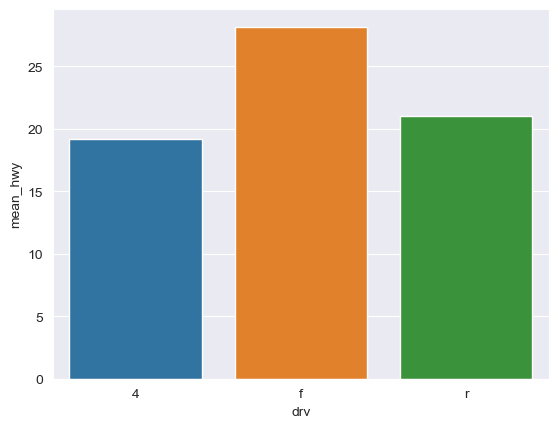

In [21]:
# 2) 그래프 만들기
# 생성된 데이터 프레임을 이용해 막대 그래프를 만듬.
# sns.barplot() : 막대 그래프 만들 때 사용.
# data : 데이터 프레임을 지정
# x : x축에 범주를 나타낸 변수
# y : y축에 평균값을 나타낸 변수

sns.barplot(data=df_mpg, x='drv', y='mean_hwy')
plt.show()

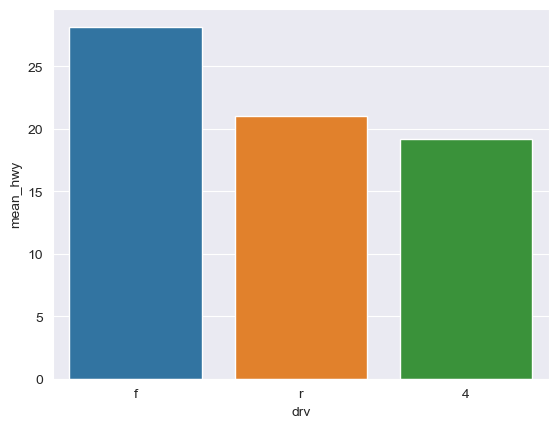

In [22]:
# 3) 그래프를 크기순으로 정렬하기
# 막대 정렬 순서는 그래프를 만드는데 사용한 데이터 프레임의 행 순서에 따라 정해짐.
# 앞에서 출력한 그래프를 보면 drv 막대가 4, f, r 순으로 정렬
# 크기 순으로 정렬할려면 그래프를 만들기 전에 df.sort_values()를 이용해 데이터 프레임을 내림차순으로 정렬.

# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
# 막대 그래프 만들기
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')
plt.show()

### 02. 빈도 막대 그래프 만들기
빈도 막대 그래프는 값의 빈도(개수)를 막대 길이로 표현한 그래프.
여러 집단의 빈도를 비교할 때 빈도 막대 그래프를 자주 사용.

In [23]:
# 1) 집단별 빈도표 만들기 <-- matplotlib 보다 간단함
# 빈도 막대 그래프를 만들려면 집단별 빈도를 담은 데이터 프레임이 필요.
# df.agg() 에 빈도를 구하는 함수 count를 적용해 '구동 방식 별 빈도'를 담은 데이터 프레임을 만듬.

# 집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index=False).agg(n=('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


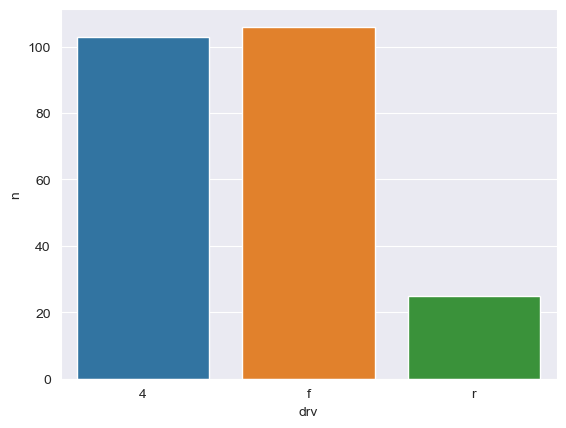

In [24]:
# 2) 그래프 만들기
# sns.barplot()을 적용해 막대 그래프 만듬.

# 막대 그래프 만들기
sns.barplot(data=df_mpg, x='drv', y='n')
plt.show()

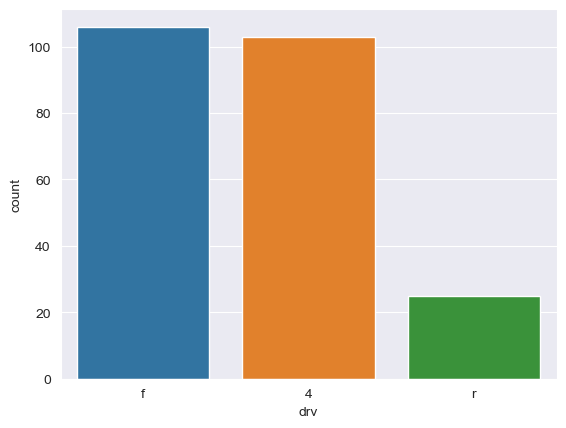

In [25]:
# sns.barplot() 사용할 때 df.groupby() 와 df.agg() 를 이용해 '집단별 빈도표'를 만드는 작업했음.
# 대신 sns.countplot() 을 이용하면 원데이터를 바로 이용해 빈도 막대 그래프를 만들 수 있음.

# 빈도 막대 그래프 만들기
sns.countplot(x='drv', data=mpg)
plt.show()
# 위와 아래를 보면 위치 순서가 다르다  

In [26]:
# 두 그래프는 x축의 순서가 다름.
# sns.barplot()으로 만든 그래프는 x 축 순서가 4, f, r 인 반면
# sns.countplot()으로 만든 그래프는 f, 4, r
# 이는 sns.barplot()에 사용한 df_mpg와 sns.countplot() 에 사용한 mpg의 drv 값 순서가 다르기 때문.

In [27]:
# 데이터 프레임에서 변수의 값 순서는 데이터 프레임에 입력된 행의 순서에 따름.
# mpg 의 drv는 0~6행이 f, 7~17행이4, 18~27 이 r로 되어 있으므로 값의 순서는 f, 4, r
# 변수의 고유값을 출력하는 unique()를 이용하면 값의 순서를 열 수 있음.
mpg['drv'].unique()  # ['f','4','r']
print(mpg['drv'].unique())

['f' '4' 'r']


In [28]:
# df_mpg 의 drv는 값의 순서가 알파벳 순으로 되엉 ㅣㅆ음.
# groupby() 를 이용해 데이터 프레임을 요약하면 값의 순서가 알파벳순으로 바뀌기 때문.
df_mpg['drv'].unique()  # ['4','f','r']

array(['4', 'f', 'r'], dtype=object)

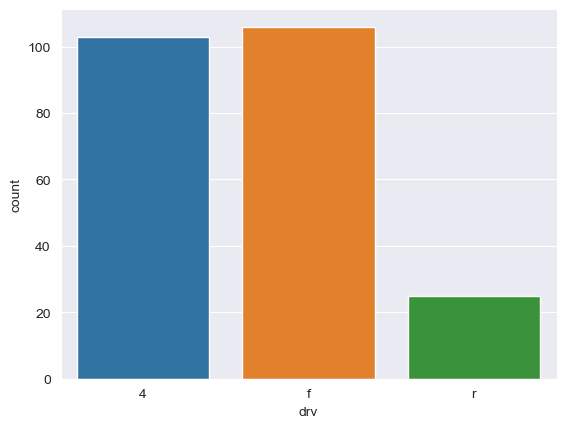

In [29]:
# 3) 막대 정렬하기
# sns.countplot() 으로 만든 그래프의 막대를 정렬하려면 order 에 원하는 순서로 값을 입력하면 됨.

# 4, f, r 순으로 막대 정렬
sns.countplot(data=mpg, x='drv', order=['4', 'f', 'r'])
plt.show()

In [30]:
# sns.countplot() 의 order에 mpg['drv'].value_counts().index 를 입력하면
# drv의 빈도가 높은 순으로 막대를 정렬.
#mpg['drv'].value_counts().index 는 빈도가 높은 순으로 변수의 값을 출력.

# drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index  # Index(['f', '4', 'r'], dtype='object', name='drv')

Index(['f', '4', 'r'], dtype='object', name='drv')

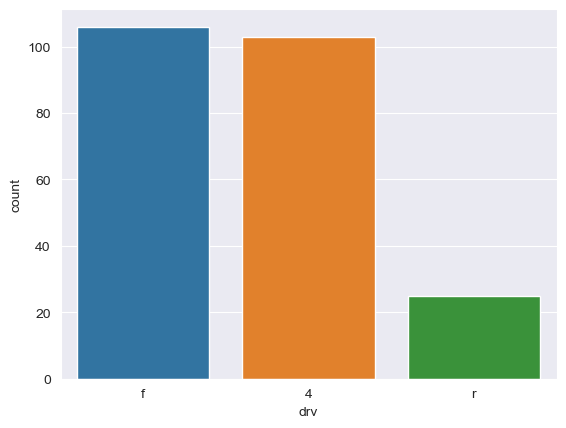

In [31]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data=mpg, x='drv', order=mpg['drv'].value_counts().index)
plt.show()